In [1]:
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [3]:
df_new = pd.read_csv('Hasil Label-Preproc - Versi uji YANG DI PAKE.csv',encoding = "ISO-8859-1")
df_new.head()

,tanggal,teks,Text_Clean,Stemming,Sentiment
0,2022-12-06 13:26:39+00:00,"b'RT @harismha: Tolong min @infomalang, info y...",Tolong min info yang punya PO medali mas. Hab...,"['tolong', 'info', 'medali', 'habis', 'tabrak'...",Negative
1,2022-12-06 13:22:10+00:00,"b'Pergi ke kampus itu challenging bangeytttt, ...","Pergi ke kampus itu challenging bangeytttt, Na...","['pergi', 'kampus', 'challenging', 'banget', '...",Positive
2,2022-12-06 13:09:54+00:00,b'tau gt kemaren ganti akun gojek aja anjir.',tau gt kemaren ganti akun gojek aja anjir.',"['kemarin', 'ganti', 'akun', 'gojek', 'anjir']",Positive
3,2022-12-06 13:09:44+00:00,b'@dukakunaon Minta jemput abang gojek lebih ...,Minta jemput abang gojek lebih sweet',"['jemput', 'abang', 'gojek']",Positive
4,2022-12-06 12:58:54+00:00,b'Doa ku tiap mau order gojek balik \xe2\x80\x...,Doa ku tiap mau order gojek balik \xe2\x80\x9c...,"['doa', 'ku', 'gojek', 'moga', 'ambil', 'hiks'...",Negative


In [4]:
print (df_new.shape)

(26840, 5)


# Mengubah label kategorik menjadi numerik

## 0 = Positif , 1 = Negatif

In [5]:
label = []
for index, row in df_new.iterrows():
    if row["Sentiment"] == 'Positive':
        label.append(0)
    else:
        label.append(1)
df_new["label"] = label
df_new = df_new.drop(columns=['Sentiment'])
df_new.tail()

,tanggal,teks,Text_Clean,Stemming,label
26835,2023-03-05 04:25:21+00:00,b'@gojekindonesia ini paylater gojek lg eror a...,"ini paylater gojek lg eror apa gimana sih, be...","['paylater', 'gojek', 'eror', 'sih', 'pakai', ...",1
26836,2023-03-05 04:25:05+00:00,b'@dykzvn @gojekindonesia Say godbye gojek apk...,Say godbye gojek apk terjelek SEPANJANG MASaa',"['sayang', 'goodbye', 'gojek', 'aplikasi', 'te...",1
26837,2023-03-05 04:22:27+00:00,b'WKWKWKWK IYAKAH @gojekindonesia ???jadi haru...,WKWKWKWK IYAKAH ???jadi harus pas gojek bgt??...,"['wkwkwkwk', 'iya', 'pas', 'gojek', 'banget', ...",1
26838,2023-02-23 13:38:12+00:00,b'@txtdrlinkedin Tapi bener loh tokopedia @tok...,Tapi bener loh tokopedia sekarang jelek ban...,"['loh', 'jelek', 'banget', 'layan']",1
26839,2023-01-05 02:50:50+00:00,b'@Saham_fes kena beban saham jelek bernama goto',kena beban saham jelek bernama goto',"['kena', 'beban', 'saham', 'jelek', 'nama', 'g...",1


In [6]:
df_new['label'].value_counts()

0    17221
1     9619
Name: label, dtype: int64

In [7]:
df = df_new[['tanggal','Stemming','label']]

In [8]:
x = df.Stemming
y = df.label
#ujicoba = df.tanggal
print(x)
print(y)

0        ['tolong', 'info', 'medali', 'habis', 'tabrak'...
1        ['pergi', 'kampus', 'challenging', 'banget', '...
2           ['kemarin', 'ganti', 'akun', 'gojek', 'anjir']
3                             ['jemput', 'abang', 'gojek']
4        ['doa', 'ku', 'gojek', 'moga', 'ambil', 'hiks'...
                               ...                        
26835    ['paylater', 'gojek', 'eror', 'sih', 'pakai', ...
26836    ['sayang', 'goodbye', 'gojek', 'aplikasi', 'te...
26837    ['wkwkwkwk', 'iya', 'pas', 'gojek', 'banget', ...
26838                  ['loh', 'jelek', 'banget', 'layan']
26839    ['kena', 'beban', 'saham', 'jelek', 'nama', 'g...
Name: Stemming, Length: 26840, dtype: object
0        1
1        0
2        0
3        0
4        1
        ..
26835    1
26836    1
26837    1
26838    1
26839    1
Name: label, Length: 26840, dtype: int64


# TF-IDF

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
bow_transformer = CountVectorizer().fit(x)

bow_transformer.vocabulary_

{'tolong': 24714,
 'info': 8856,
 'medali': 13111,
 'habis': 7768,
 'tabrak': 23608,
 'henti': 8155,
 'kabur': 9871,
 'bantu': 1751,
 'gojek': 7419,
 'pergi': 19081,
 'kampus': 10165,
 'challenging': 3572,
 'banget': 1698,
 'capek': 3316,
 'benar': 2120,
 'bawa': 1904,
 'kemarin': 10570,
 'ganti': 6904,
 'akun': 540,
 'anjir': 906,
 'jemput': 9514,
 'abang': 41,
 'doa': 5310,
 'ku': 11448,
 'moga': 13889,
 'ambil': 724,
 'hiks': 8248,
 'mulu': 14163,
 'ap': 1017,
 'makan': 12606,
 'tuh': 25028,
 'gofood': 7403,
 'mikir': 13581,
 'apa': 1018,
 'hahaha': 7813,
 'kena': 10605,
 'serang': 21923,
 'tiket': 24460,
 'dwp': 5602,
 'pas': 18739,
 'vip': 25672,
 'jumat': 9798,
 'sayang': 21372,
 'nge': 15449,
 'ok': 18116,
 'lets': 12045,
 'buka': 3024,
 'hp': 8432,
 'aplikasi': 1074,
 'retweet': 20550,
 'kayak': 10381,
 'tunggu': 25094,
 'di': 4694,
 'klakson': 11025,
 'kali': 10087,
 'kaget': 9906,
 'asu': 1290,
 'pulang': 19931,
 'mengajak': 13306,
 'omong': 18210,
 'ehm': 5719,
 'sih': 22345

In [11]:
title_bow = bow_transformer.transform(x)

print(title_bow)

  (0, 1751)	1
  (0, 7419)	1
  (0, 7768)	1
  (0, 8155)	1
  (0, 8856)	1
  (0, 9871)	1
  (0, 13111)	1
  (0, 23608)	1
  (0, 24714)	1
  (1, 1698)	1
  (1, 1904)	1
  (1, 2120)	1
  (1, 3316)	1
  (1, 3572)	1
  (1, 10165)	1
  (1, 19081)	1
  (2, 540)	1
  (2, 906)	1
  (2, 6904)	1
  (2, 7419)	1
  (2, 10570)	1
  (3, 41)	1
  (3, 7419)	1
  (3, 9514)	1
  (4, 724)	1
  :	:
  (26836, 1074)	1
  (26836, 7419)	1
  (26836, 7469)	1
  (26836, 21372)	1
  (26836, 24205)	1
  (26837, 1698)	1
  (26837, 6449)	1
  (26837, 7419)	1
  (26837, 7488)	1
  (26837, 7950)	1
  (26837, 9203)	1
  (26837, 18739)	1
  (26837, 23311)	1
  (26837, 26138)	1
  (26837, 26359)	1
  (26838, 1698)	1
  (26838, 9498)	1
  (26838, 11872)	1
  (26838, 12275)	1
  (26839, 1985)	1
  (26839, 7543)	1
  (26839, 9498)	1
  (26839, 10605)	1
  (26839, 14412)	1
  (26839, 20949)	1


In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer().fit(title_bow)
print(tfidf_transformer)

title_tfidf=tfidf_transformer.transform(title_bow)
print(title_tfidf)
print(title_tfidf.shape)


TfidfTransformer()
  (0, 24714)	0.2745925781669147
  (0, 23608)	0.3829965913344904
  (0, 13111)	0.4871676100395662
  (0, 9871)	0.40953018946980124
  (0, 8856)	0.282919216923591
  (0, 8155)	0.3848885531048716
  (0, 7768)	0.2588401390232455
  (0, 7419)	0.10906769095655505
  (0, 1751)	0.256493294818767
  (1, 19081)	0.3854189355216349
  (1, 10165)	0.3872319492776889
  (1, 3572)	0.549241914395374
  (1, 3316)	0.3680187186701302
  (1, 2120)	0.35286078543624344
  (1, 1904)	0.3189684394447587
  (1, 1698)	0.19531411756236172
  (2, 10570)	0.45229763187490185
  (2, 7419)	0.19192327442485685
  (2, 6904)	0.5257524857043296
  (2, 906)	0.5310411197047529
  (2, 540)	0.4474058134320987
  (3, 9514)	0.7576324406359503
  (3, 7419)	0.2621574957801732
  (3, 41)	0.5977177697728935
  (4, 14163)	0.3568709896327415
  :	:
  (26836, 24205)	0.6350227231839939
  (26836, 21372)	0.37862508883346435
  (26836, 7469)	0.5686091671635359
  (26836, 7419)	0.13668206465948074
  (26836, 1074)	0.33375262001046146
  (26837, 2635

import csv
print(title_tfidf)
with open('Hasil tf-idf.csv', 'w', newline='') as csvfile:
    fieldnames = ['title_tfidf']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for title_tfidf in title_tfidf:
        thewriter.writerow({'title_tfidf':title_tfidf})

# Split Data

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(title_tfidf,y, test_size=.3, random_state=0)
print('Total data training : ', ytrain.shape)
print('Total data testing : ', ytest.shape)
print(xtest)

Total data training :  (18788,)
Total data testing :  (8052,)
  (0, 19309)	0.26635645627358095
  (0, 18532)	0.2620947870321293
  (0, 18251)	0.18737338262941844
  (0, 10979)	0.4662320178549286
  (0, 2509)	0.6145295723889196
  (0, 2272)	0.2839590536401024
  (0, 2095)	0.38678177611697634
  (1, 26573)	0.2294059363053352
  (1, 20806)	0.2633129085832867
  (1, 15963)	0.2183723576861995
  (1, 11533)	0.3803181158756878
  (1, 10692)	0.48607112549273646
  (1, 7744)	0.2786989992571364
  (1, 4488)	0.13665405588961624
  (1, 3427)	0.13598183450366114
  (1, 3423)	0.48607112549273646
  (1, 3125)	0.31359539557856336
  (2, 25074)	0.48504926061835013
  (2, 12606)	0.31527894230534953
  (2, 11349)	0.4153456553375534
  (2, 5646)	0.5152585990225632
  (2, 2835)	0.47678398257275334
  (3, 11940)	0.6511293209410051
  (3, 4488)	0.2078359252790097
  (3, 3873)	0.21108125493879298
  :	:
  (8049, 25493)	0.2821166001482862
  (8049, 25090)	0.3916194069234262
  (8049, 20842)	0.3841727221464765
  (8049, 20008)	0.254940532

In [14]:
ytrain.value_counts()

0    12029
1     6759
Name: label, dtype: int64

import csv
print(xtest)
with open('Hasil testing 8.csv', 'w', newline='') as csvfile:
    fieldnames = ['xtest']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for xtest in xtest:
        thewriter.writerow({'xtest':xtest})

## SMOTE

from collections import Counter
from imblearn.combine import SMOTEENN

counter = Counter(ytrain)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(xtrain, ytrain)

counter = Counter(y_train_smenn)
print('After',counter)

In [15]:
from collections import Counter
from imblearn.combine import SMOTETomek

counter = Counter(ytrain)
print('Before',counter)
#oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(xtrain, ytrain)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 12029, 1: 6759})
After Counter({0: 11932, 1: 11932})


from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

counter = Counter(y_train_smtom)
print('Before',counter)
#oversampling the train dataset using SMOTE + Tomek
sm = RandomUnderSampler(random_state=139)
x_train_sm, y_train_sm = sm.fit_resample(x_train_smtom, y_train_smtom)

counter = Counter(y_train_sm)
print('After',counter)


from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train_smenn)
print('Before',counter)
#oversampling the train dataset using SMOTE
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_resample(xtrain, ytrain)

counter = Counter(y_train_sm)
print('After',counter)

In [16]:
ytrain.value_counts()

0    12029
1     6759
Name: label, dtype: int64

## Before SMOTETOMEK

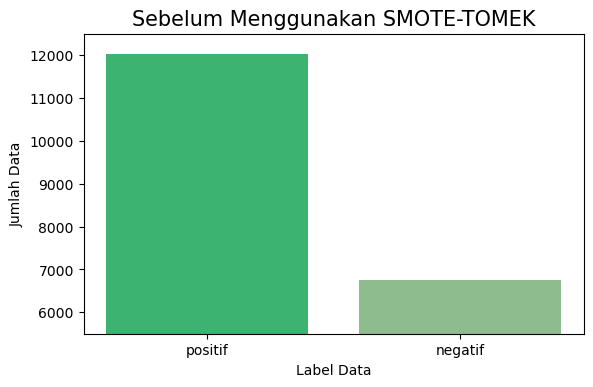

In [17]:
import matplotlib.pyplot as plt
#melakukan plotting data berdasarkan label positif dan negatif
positif = len(ytrain[ytrain==0])
negatif = len(ytrain[ytrain==1])
fig=plt.figure(figsize=(5, 3))
ax=fig.add_axes([0,0,1,1])
lbl=['positif','negatif']
jumlah=[positif,negatif]
ax.bar(lbl,jumlah, color=('#3CB371','#8FBC8F'))
plt.title("Sebelum Menggunakan SMOTE-TOMEK",fontsize=15)
plt.ylim(5500,12500)
plt.ylabel('Jumlah Data',fontsize=10)
plt.xlabel('Label Data',fontsize=10)
#plt.savefig('Before Smote.png', quality=95)
plt.show()

## After SMOTETOMEK

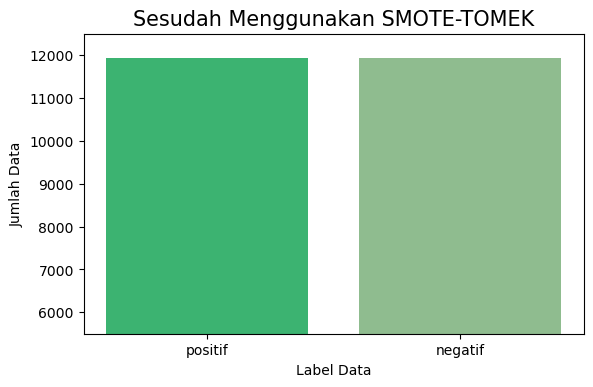

In [18]:
import matplotlib.pyplot as plt
#melakukan plotting data berdasarkan label positif dan negatif
positif = len(y_train_smtom[y_train_smtom==0])
negatif = len(y_train_smtom[y_train_smtom==1])
fig=plt.figure(figsize=(5, 3))
ax=fig.add_axes([0,0,1,1])
lbl=['positif','negatif']
jumlah=[positif,negatif]
ax.bar(lbl,jumlah, color=('#3CB371','#8FBC8F'))
plt.ylim(5500,12500)
plt.ylabel('Jumlah Data',fontsize=10)
plt.xlabel('Label Data',fontsize=10)
plt.title("Sesudah Menggunakan SMOTE-TOMEK",fontsize=15)
#plt.savefig('After Smote.png')
plt.show()

# NAIVE BAYES

In [19]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
#.fit untuk melatih model
model = MultinomialNB().fit(x_train_smtom,y_train_smtom)
#model = MultinomialNB().fit(title_tfidf,y)


In [20]:
import csv
#predict untuk memprediksi hasil model

predicted = model.predict(xtest)
#predicted = model.predict(title_tfidf)
print(predicted)

with open('Hasil prediksi 11.csv', 'w', newline='') as csvfile:
    fieldnames = ['prediksi']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()
    for prediksi in predicted:
        thewriter.writerow({'prediksi':prediksi})

        
#print('\n Akurasi klasifikasi : ',metrics.accuracy_score(y,predicted))
#print('\n Confusion matrix :\n', metrics.confusion_matrix(y,predicted))
#print('\n Hasil klasifikasi :\n', metrics.classification_report(y,predicted))
print('\n Akurasi klasifikasi : ',metrics.accuracy_score(ytest,predicted))
print('\n Confusion matrix :\n', metrics.confusion_matrix(ytest,predicted))
print('\n Hasil klasifikasi :\n', metrics.classification_report(ytest,predicted))

[0 0 0 ... 0 1 0]

 Akurasi klasifikasi :  0.7041728763040238

 Confusion matrix :
 [[3606 1586]
 [ 796 2064]]

 Hasil klasifikasi :
               precision    recall  f1-score   support

           0       0.82      0.69      0.75      5192
           1       0.57      0.72      0.63      2860

    accuracy                           0.70      8052
   macro avg       0.69      0.71      0.69      8052
weighted avg       0.73      0.70      0.71      8052



## Heatmap

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


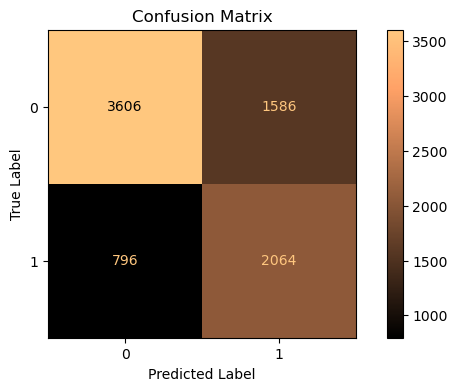

In [46]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib. pyplot as plt
matrix = plot_confusion_matrix(model, xtest, ytest, cmap=plt.cm.copper)
matrix.ax_.set_title('Confusion Matrix', color='Black')
plt.xlabel('Predicted Label', color='Black')
plt.ylabel('True Label', color='Black')
plt.gcf().axes[0].tick_params(colors='Black')
plt.gcf().axes[1].tick_params(colors='Black')
plt.gcf().set_size_inches(8,4)
plt.show()